# A Very Brief Introduction to Jupyter Notebooks

### Introduction

This **Jupyter Notebook** brings together various tools for the analysis of symbolic music scores used in **The CRIM Project** (https://crimproject.org). It relies on **Pandas**, a popular Python package that makes the manipulaton of tabular information (in things called **data frames**) fast and relatively easy. 

<br>

Some of these tools are meant to give insights in **one work at a time**.  Others are meant to help us explore **sets of pieces**, or even **an entire corpus**.  There are tools for exploring pitches, durations, melodic and harmonic patterns, contrapuntal types (like cadences and points of imitation), and various tools (like heat maps and networks) that can help us visualize activity in a piece or relationships among several pieces.

<br>

These Notebooks are available via the **CRIM Jupyter Hub**, hosted by **Haverford College**:  **https://ds-crim.haverford.edu/**.  Contact Richard Freedman for login and password.


### Run the Notebook ####

* **Jupyter Notebooks** allow anyone to run **Python** code in any browser.  And Haverford's **Jupyter Hub** allows you do so over the internet, without the need to install special software on your own computer.

* **Jupyter Notebooks** are organized as 'cells', which can be **commentary** (like this one, which is static), or **code** (those below, which produce dyanmic output in the form of charts or tabular data frames.  

* To run an individual cell, use the **`arrow/run`** command at the top of the Notebook, or just press **`Shift + Enter`** on your keyboard.
* Use the practice cells below to try out some basic functions.

### Import Music Files

* If you are exploring pieces from CRIM, importing simply involves providing the CRIM URL of the MEI file:  
    * **`piece = importScore('https://crimproject.org/mei/CRIM_Model_0008.mei')`**

* But you can also use the Notebook with any MEI, MusicXML, or MIDI file of your own. You can easily do this when you run the Notebooks on Jupyter Hub, you will also find a folder called **`Music_Files`**.  Upload the file here, then provide the path to that file: 
    * **`piece = importScore('Music_Files/My_File_Name.mei')`**.  
    
* All CRIM Intervals methods can be applied to a **group of pieces** as we as a single one. Read the documentation by copying the following into a new cell, then run it):  **`print(CorpusBase.batch.__doc__)`**

### Save outputs as CSV or Excel

* The **Jupyter Hub** version of these Notebooks also provides a folder called **`saved_csv`**.  You can save **csv** files of any data frame there with this command: 
    * **`notebook_data_frame_name.to_csv('saved_csv/your_file_title.csv')`**.
* If you prefer **Excel** documents (which are better for anything with a complex set of columns or hierarhical index), use **ExcelWriter**.  In the following code, you will need to provide these commands:
    * **`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')`**
* Now convert your dataframe to Excel
    * **`frame_name.to_excel(writer, sheet_name='Sheet1')`**
* And finally save the new file to the folder here in the Notebook:
    * **`writer.save()`**

Put the following code to a new cell and update the frame_name and file_name:

`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')` <br>
`frame_name.to_excel(writer, sheet_name='Sheet1')` <br>
`writer.save()` <br>

### Read Documentation for Each Method

- Read the documentation with this command ```print(ImportedPiece.YourMethod.__doc__)```, where you will replace ```'YourMethod'``` with the name of the individual method, for example ```print(ImportedPiece.melodic.__doc__)```.



## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [6]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os




MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)

else:
    print(MUSDIR, "folder already exists.")

saved_csv folder already exists.
Music_Files folder already exists.


## B. Importing Pieces

### B.1 Import a Single Piece and Check Metadata for Title and Composer

- Here you will want to select the appropriate 'prefix' that identifies the location of your file.
- `'Music_Files/'` is for files in the local notebook; `'https://crimproject.org/mei/'` is for the files on CRIM.
- Then provide the full name (and extension) of your music file, such as `'CRIM_Model_0038.mei'`

In [20]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'    

# Add your filename here

mei_file = 'CRIM_Mass_0029_4.mei'
url = prefix + mei_file

piece = importScore(url)

print(piece.metadata)

Successfully imported https://crimproject.org/mei/CRIM_Mass_0029_4.mei
{'title': 'Missa Benedicta es: Sanctus', 'composer': 'Nicole des Celliers de Hesdin'}


## C.  Get Table of Notes and Rests

* **CRIM Intervals** is based on **Pandas**, which is a **Python** code library
<br>

* **Pandas Data Frames** are tables that can be processed in all kinds of ways (search for patterns, statistics, visualizations, etc).
<br>

* The column at the left of these data frames is an **index**, in this case corresponding to the **offset** numbers from music21. An offset of 1.0 corresponds to one quarter note. 
<br>

* Note that music21 uses `zero-based indexing`, so that the first note of the piece is **0**.




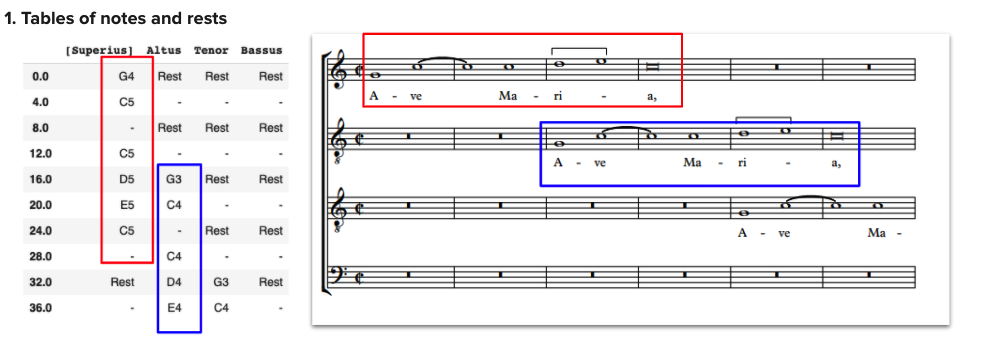

### C.1  Get Table of Notes and Rests

* Most methods in CRIM Intervals involve combining the reference to your **`piece`** with **`SomeMethod()`**, for example:  

    * **`piece.notes()`**.  Note that the parentheses are required!
<br>

* In the Pandas library, results are posted in a  **data frame**, roughly like an **Excel** spreadsheet. Long data frames are automatically abbreviated to show only the **first five** and **last five** rows. 
<br>

* To see more rows, try **`piece.notes.head(20)`** (which is the first 20 rows), or **`piece.notes.tail(20)`**, which is the last 20 rows.
<br>
* Or save a CSV of the entire output with: **`piece.notes.to_csv('saved_csv/List_all_Notes.csv')`**
    * (You can replace **`List_all_Notes`** with any file name you prefer.  The resulting file will be in the `saved_csv` folder in your notebook.  You can then download it to your computer.)
<br>

* no unisons?

    * adding `combineUnisons=True` to the request for notesRests will combine all unisons to a single note. The total duration will be the same as for the individual notes.


In [21]:
print(ImportedPiece.notes.__doc__)


        Return a table of the notes and rests in the piece. Rests are
        designated with the string "Rest". Notes are shown such that middle C
        is "C4".
        If `combineRests` is True (default), non-first consecutive rests will be
        removed, effectively combining consecutive rests in each voice.
        `combineUnisons` works the same way for consecutive attacks on the same
        pitch in a given voice, however, `combineUnisons` defaults to False.
        


In [28]:

nr = piece.notes()
piece.detailIndex(nr)


Superius Contratenor Tenor Quintus Bassus
Measure Beat                                              
1       1.000000       G4          G3  Rest    Rest   Rest
        4.000000      NaN          A3   NaN     NaN    NaN
2       1.000000       G4          B3   NaN     NaN    NaN
        2.000000      NaN          C4   NaN     NaN    NaN
        3.000000       A4         NaN   NaN     NaN    NaN
        4.000000      NaN          D4   NaN     NaN    NaN
3       1.000000       A4          C4   NaN     NaN    NaN
        2.000000      NaN          D4   NaN     NaN    NaN
        3.000000       B4         NaN   NaN     NaN    NaN
        3.500000      NaN          B3   NaN     NaN    NaN
        4.000000      NaN          E4   NaN     NaN    NaN
4       1.000000      NaN          D4   NaN      G3    NaN
        2.000000       G4          E4   NaN     NaN    NaN
        3.000000       G4         NaN   NaN      G3     C3
        3.500000      NaN          D4   NaN     NaN    NaN
        4.000000      NaN          C4   NaN     NaN    NaN
        4.500000      NaN          B3   NaN     NaN    NaN
5       1.000000      NaN          C4   NaN      A3     C3
        2.000000       F4         NaN   NaN     NaN    NaN
        2.500000       E4         NaN   NaN     NaN    NaN
        3.000000       F4        Rest   NaN      A3     D3
        3.500000       E4         NaN   NaN     NaN    NaN
        4.000000       D4         NaN   NaN     NaN    NaN
        4.500000       C4         NaN   NaN     NaN    NaN
6       1.000000       D4         NaN   NaN      B3    NaN
        2.000000      NaN         NaN   NaN     NaN     G2
        3.000000      NaN         NaN   NaN     NaN     G2
        4.000000      NaN         NaN   NaN      A3     G3
        4.500000      NaN         NaN   NaN      G3    NaN
7       1.000000     Rest          D4   NaN      A3    NaN
        1.500000      NaN         NaN   NaN     NaN     F3
        2.000000      NaN         NaN   NaN     NaN     F3
        2.500000      NaN         NaN   NaN     NaN     E3
        3.000000      NaN          D4    G3     NaN     G3
8       1.000000      NaN          E4    G3    Rest     C3
        3.000000      NaN          E4    A3     NaN   Rest
        4.000000      NaN         NaN   NaN     NaN     C3
9       1.000000      NaN          F4   NaN     NaN     D3
        1.500000      NaN         NaN   NaN     NaN     E3
        2.000000      NaN         NaN    D3     NaN     F3
        2.500000      NaN         NaN   NaN     NaN     G3
        3.000000      NaN         NaN    D3     NaN     A3
        4.000000       G4          E4    D4     NaN    B-3
        4.500000      NaN          D4   NaN     NaN    NaN
10      1.000000       C5          E4   NaN     NaN     A3
        1.500000      NaN         NaN    C4     NaN    NaN
        2.000000      NaN         NaN    C4     NaN    NaN
        2.500000      NaN         NaN    B3     NaN    NaN
        2.750000      NaN         NaN    C4     NaN    NaN
        3.000000       B4        Rest    D4     NaN     G3
        4.000000      NaN          D4   NaN      G3    NaN
        4.500000       A4         NaN   NaN     NaN    NaN
11      1.000000       G4          E4  Rest      C4   Rest
        1.500000      NaN          D4   NaN     NaN    NaN
        2.000000       A4          E4    A3     NaN    NaN
        2.500000      NaN          F4   NaN     NaN    NaN
        3.000000       B4          G4    D4      B3    NaN
        4.000000      NaN         NaN   NaN      G3    NaN
12      1.000000       A4        Rest    C4      A3    NaN
        2.000000       G4          D4    B3      B3    NaN
        3.000000      NaN          E4    A3      C4    NaN
        3.500000       C4          D4   NaN     NaN    NaN
        4.000000       C5          E4   NaN      A3    NaN
        4.500000      NaN          F4   NaN     NaN    NaN
13      1.000000      NaN          G4    G3      D4    NaN
        2.000000       B4         NaN   NaN     NaN    NaN
     

###  Combine Unisons

In [10]:
nr_no_unisons = piece.notes(combineUnisons=True)
nr_no_unisons.head(5)


,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,NaN,NaN,NaN
16.0,D5,G3,NaN,NaN
20.0,E5,C4,NaN,NaN
24.0,C5,NaN,NaN,NaN


### C.2  Removing NaN

* Missing values (such as when one voice has a new note at a given offset but another voice simply continues the previous note or rest) are marked in data frames as **NaN**, which stands for **Not a Number**. Sometimes it is helpful to remove these, either for human readers or for other data processing you might need to perform.
<br>
* You can replace NaN by adding **`fillna("-")`** to your request for Notes and Rests:  **`piece.notes().fillna("-")`**.
<br>
* And by giving the entire expression a name with (such as `nr` you can quite easily reuse the entire request in a subsequent step:  **`nr = piece.notes().fillna("-")`**

In [11]:
nr = piece.notes().fillna("-")
nr.head(5)


,[Superius],Altus,Tenor,Bassus
0.0,G4,Rest,Rest,Rest
4.0,C5,-,-,-
12.0,C5,-,-,-
16.0,D5,G3,-,-
20.0,E5,C4,-,-


### C.3  Count, Sort and Graph Notes

* The Pandas library includes a vast array of standard methods for working with data frames (renaming columns, sorting data, counting categories, etc).  You can read just a few of the basic ones here:  **https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf**

<br>

* Using our dataframe of notes+rests (**`nr`**), you can experiment with a few (try them out below):

    * **count the number of rows** (which tells us simply how large the dataframe is):  **`nr.count`**
    * **rename a columns**:  **`nr.rename(columns = {'[Superius]':'Cantus'})`**
    * **stack all the columns** on top of each other to get one list of all the notes:  **`nr.stack()`**
    * **stack and count the number of unique values** (which will tell us how many different tones are in this piece): **`nr.stack().nunique()`**
    * **count the number of each note in each part**:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int)`**
    * **count and sort** the number of notes in a single voice part:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values(by=nr.columns[0], ascending=False)`**
      * This sorts by the first voice in the score.  If you want to sort by the last, then use `by=nr.columns[-1]` in he request.



In [12]:
# Counts of notes in Each part, sorted alphabetically by note
nr.apply(pd.Series.value_counts).fillna(0).astype(int)

# or sorted by the counts in the first voice:

nr.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values(by=nr.columns[0], ascending=False)


,[Superius],Altus,Tenor,Bassus
-,285,223,292,306
C5,62,0,0,0
B4,41,1,0,0
D5,38,0,0,0
G4,31,46,17,0
E5,31,0,0,0
A4,23,10,4,0
Rest,20,24,19,17
F5,4,0,0,0
E4,4,42,33,0


### C.2 Sort Pitches from Low to High

The previous cell simply sorts the columns by the **counts** of the pitches in a particular voice.  

But we can also declare a **sort order** for the pitches themselves, then organize the entire data frame in that sequence.  This will show the voice ranges of each part.

We first create a list of the pitches in order (from low to high, in this case).  Note that music21 (and thus CRIM Intervals) represents **B-flat** as **B-**.  **C-sharp** is **C#**.

`pitch_order = ['E-2', 'E2', 'F2', 'F#2', 'G2', 'A2', 'B-2', 'B2', 
               'C3', 'C#3', 'D3', 'E-3','E3', 'F3', 'F#3', 'G3', 'G#3','A3', 'B-3','B3',
               'C4', 'C#4','D4', 'E-4', 'E4', 'F4', 'F#4','G4', 'A4', 'B-4', 'B4',
               'C5', 'C#5','D5', 'E-5','E5', 'F5', 'F#5', 'G5', 'A5', 'B-5', 'B5']`



In [13]:
# set your order of pitches
pitch_order = ['E-2', 'E2', 'F2', 'F#2', 'G2', 'A2', 'B-2', 'B2', 
               'C3', 'C#3', 'D3', 'E-3','E3', 'F3', 'F#3', 'G3', 'G#3','A3', 'B-3','B3',
               'C4', 'C#4','D4', 'E-4', 'E4', 'F4', 'F#4','G4', 'A4', 'B-4', 'B4',
               'C5', 'C#5','D5', 'E-5','E5', 'F5', 'F#5', 'G5', 'A5', 'B-5', 'B5']

# get notes and rests, then fill the NA's (which are Nulls and will confuse things)
nr = piece.notes()
nr.fillna('-')

# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
nr = nr.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
nr.rename(columns = {'index':'pitch'}, inplace = True)

# apply the categorical list and sort
nr['pitch'] = pd.Categorical(nr["pitch"], categories=pitch_order)
nr = nr.sort_values(by = "pitch").dropna().copy()
nr

,pitch,[Superius],Altus,Tenor,Bassus
22,G2,0,0,0,3
0,A2,0,0,0,4
3,B-2,0,0,0,1
5,B2,0,0,0,4
8,C3,0,0,0,45
11,D3,0,0,0,14
14,E3,0,0,0,27
19,F3,0,2,0,29
17,F#3,0,0,0,7
23,G3,0,20,15,49


### Voice Ranges as a Chart

There are Python libraries for many different kinds of graphs and charts.  Here will will use **Seaborn** and **Matplot** to create a histogram of the counts of each pitch in each voice.  The result is a nice graphical summary of the overlapping ranges.

You can choose various colors and other options (too many to explain here!)

title : Ave Maria
composer : Josquin Des Prés
['pitch', '[Superius]', 'Altus', 'Tenor', 'Bassus']


<AxesSubplot:xlabel='pitch'>

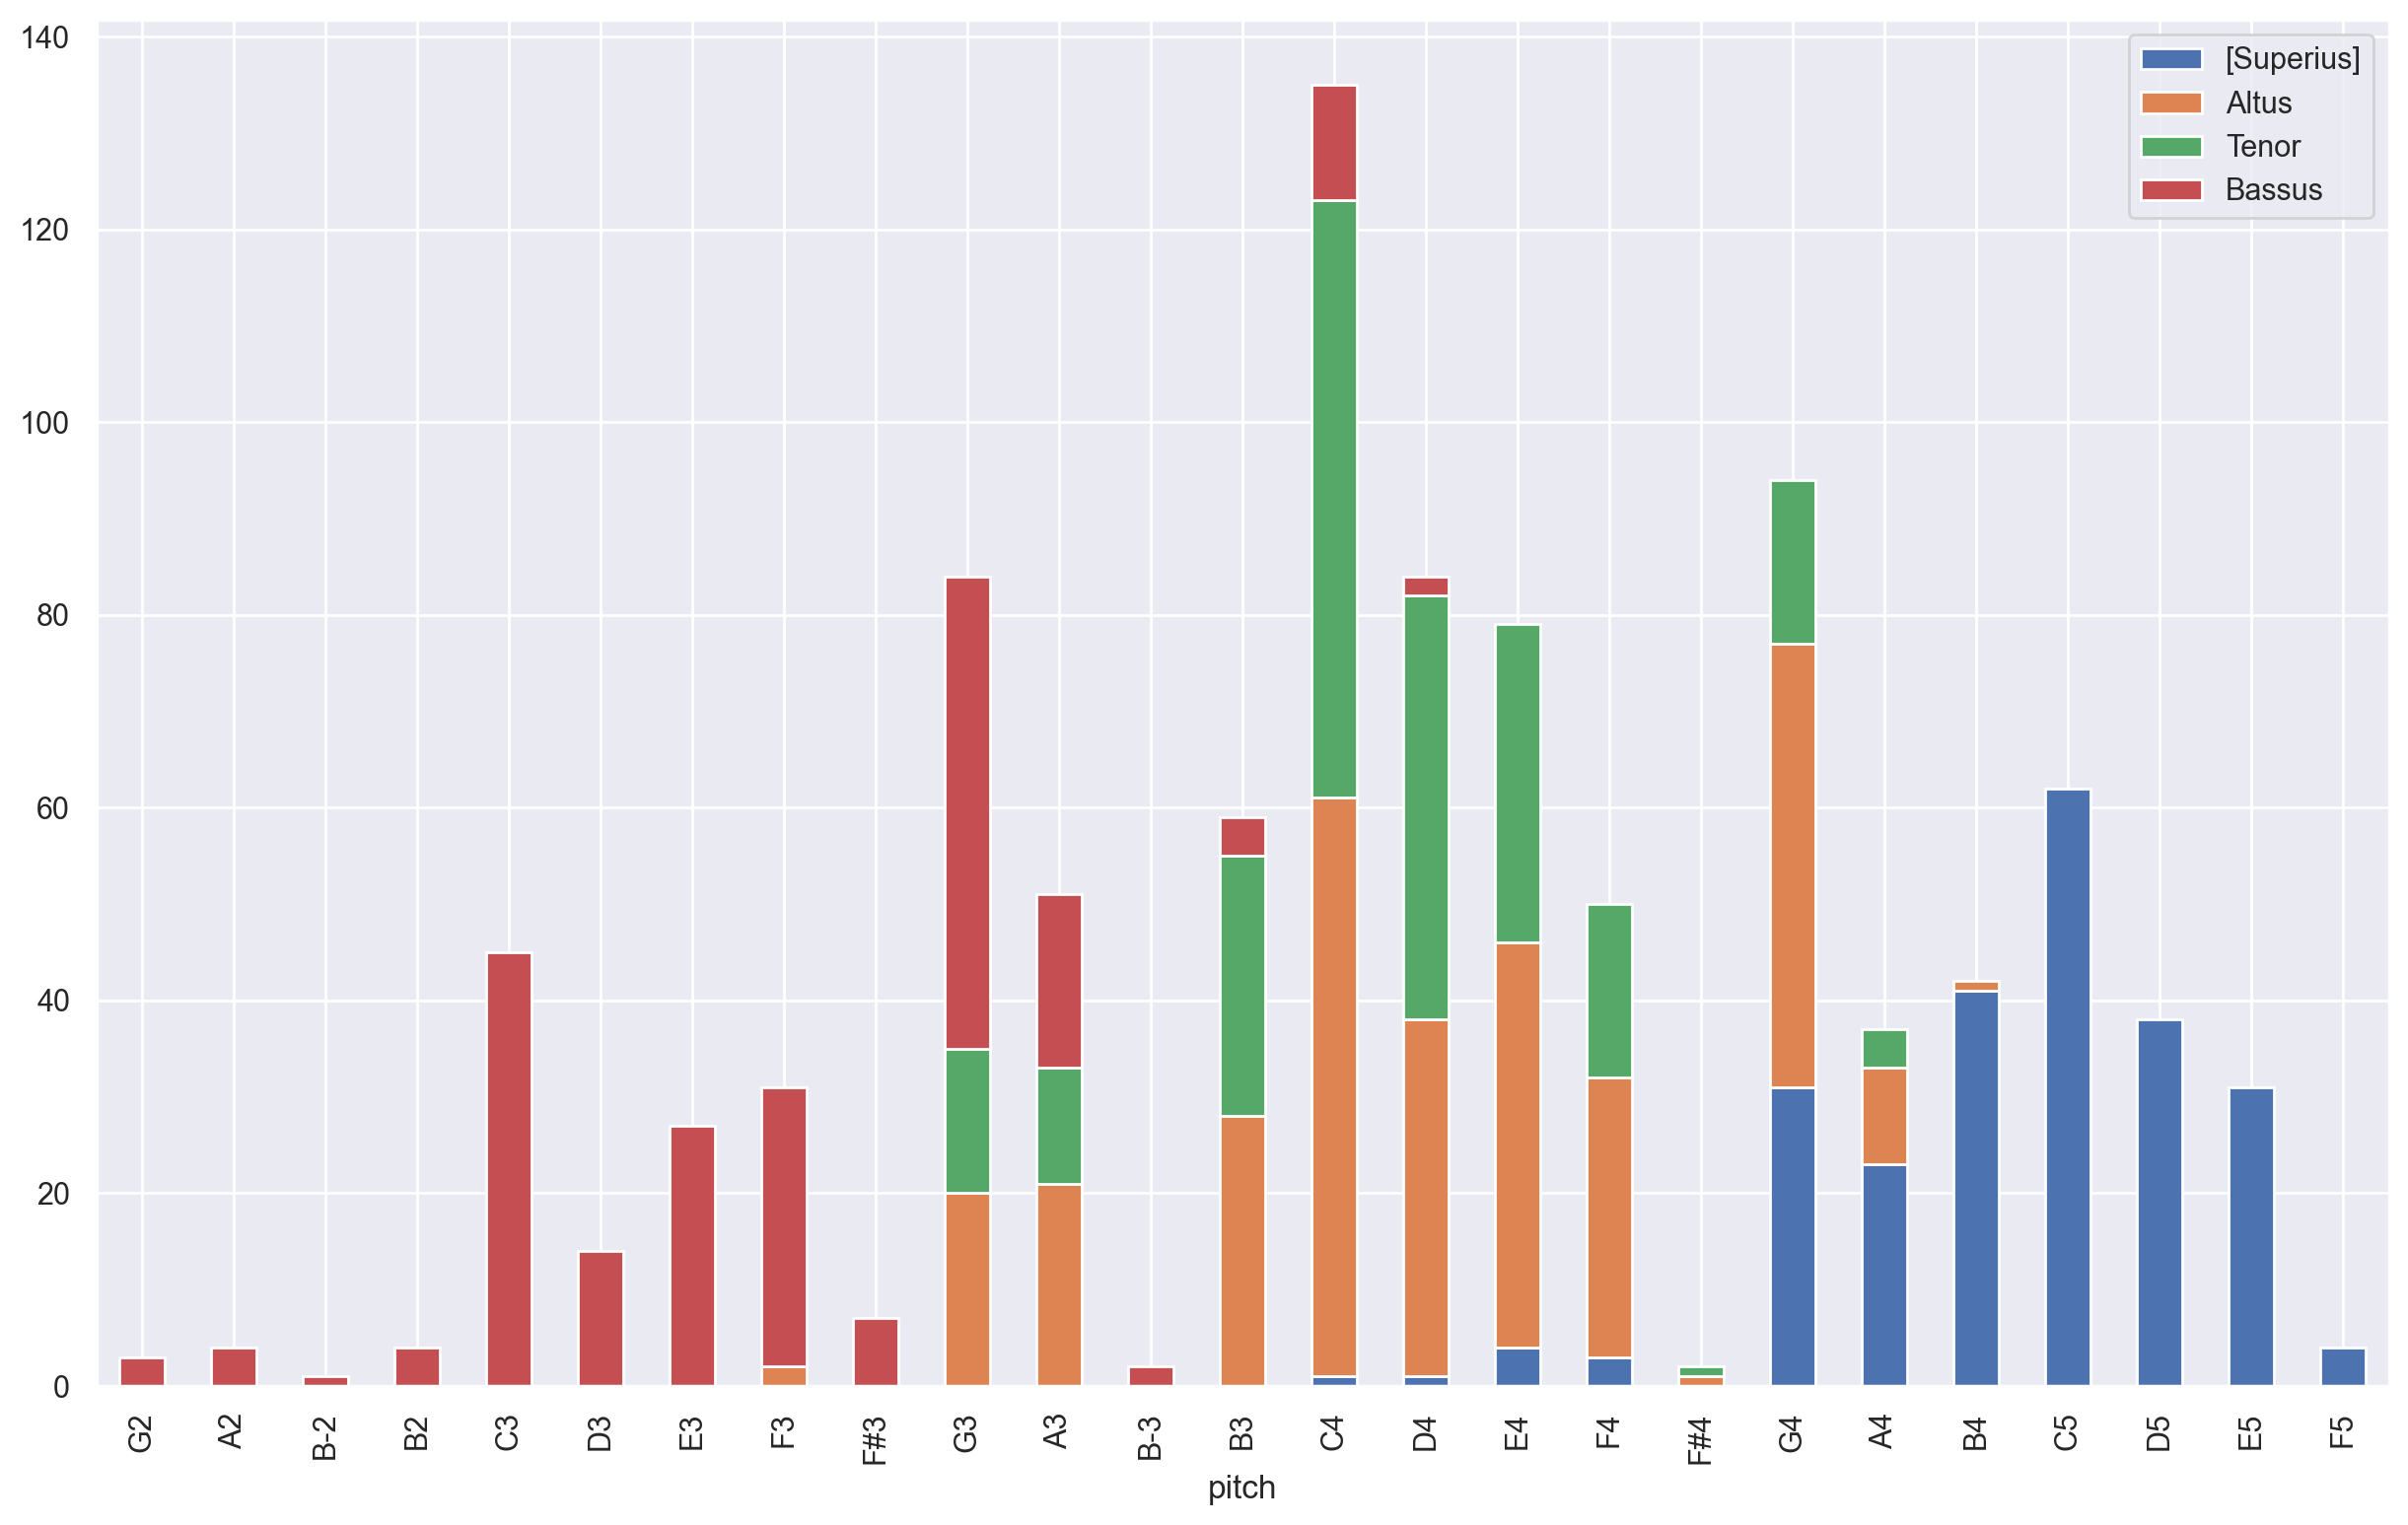

In [14]:
%matplotlib inline
nr = piece.notes()
nr.fillna('-')
# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
nr = nr.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()
# rename the index column to something more useful
nr.rename(columns = {'index':'pitch'}, inplace = True)

# apply the categorical list and sort
nr['pitch'] = pd.Categorical(nr["pitch"], categories=pitch_order)
nr = nr.sort_values(by = "pitch").dropna().copy()
voices = nr.columns.to_list()
palette = sns.husl_palette(len(voices), l=.4)
md = piece.metadata
for key, value in md.items():
    print(key, ':', value)
print(voices)
sns.set(rc={'figure.figsize':(15,9)})
# sns.set(rc={'figure.figsize':(15,9)})
nr.set_index('pitch').plot(kind='bar', stacked=True)


### C. 3 Durations and Time Signatures
* We can use **`piece.durations()`** to tell us more about rhythms, and then combine the two dataframes into a synoptic view of the pitches and durations of the given piece.  Again, it is helpful to define this request as as variable that we can use later: **`dur = piece.durations().fillna('-')`**
<br>
* And of course we could **apply any of the tools noted above**, counting, sorting, etc, as needed.

* **Time Signatures** display each change of time signature with `piece.timeSignatures()`.  To see the measure/beat index, pass this to `piece.detailIndex()`:
    * ts = piece.timeSignatures()
    * piece.detailIndex(ts)

In [15]:
ts = piece.timeSignatures()
piece.detailIndex(ts)

,,[Superius],Altus,Tenor,Bassus
Measure,Beat,,,,
1,1.0,4/2,4/2,4/2,4/2
93,1.0,3/1,3/1,3/1,3/1
109,1.0,4/2,4/2,4/2,4/2
150,1.0,8/2,8/2,8/2,8/2


In [16]:
dur = piece.durations().fillna('-')
dur

,[Superius],Altus,Tenor,Bassus
0.0,4.0,16.0,32.0,48.0
4.0,8.0,-,-,-
12.0,4.0,-,-,-
16.0,4.0,4.0,-,-
20.0,4.0,8.0,-,-
...,...,...,...,...
1248.0,8.0,4.0,8.0,8.0
1252.0,-,4.0,-,-
1256.0,16.0,16.0,16.0,16.0
1272.0,16.0,16.0,16.0,16.0


### C.4 Combining Notes and Durations in a Single Data Frame

* Two or more data frames can be combined into one. Here we can combine **`nr`** (our Notes and Rests) with **`dur`** to make a single data frame.  This frame can it self be given a new name:  **`combined_notes_durs = pd.concat([nr, dur], axis=1)`**.


In [17]:
combined_notes_durs = pd.concat([nr, dur], axis=1)
combined_notes_durs.head()

,pitch,[Superius],Altus,Tenor,Bassus,[Superius],Altus,Tenor,Bassus
0.0,A2,0.0,0.0,0.0,4.0,4.0,16.0,32.0,48.0
1.0,A3,0.0,21.0,12.0,18.0,NaN,NaN,NaN,NaN
2.0,A4,23.0,10.0,4.0,0.0,NaN,NaN,NaN,NaN
3.0,B-2,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN
4.0,B-3,0.0,0.0,0.0,2.0,8.0,-,-,-


* We can also reorder the columns to put the information for each voice together.  Here we will use Pandas **iloc**, which is a way to refer to row or column by it's **index** number.  

* In Pandas the first row (or column) is **`0`**.  So to see just the notes_rests and durations for the Superius:  **`combined_notes_durs.iloc[:, [0, 4]]`**.

* To see all the voices reorganized in this way:  **`combined_notes_durs.iloc[:, [0, 4, 1, 5, 2, 6, 3, 7]]`**

In [18]:
combined_notes_durs.iloc[:, [0, 4, 1, 5, 2, 6, 3, 7]]

,pitch,Bassus,[Superius],[Superius],Altus,Altus,Tenor,Tenor
0.0,A2,4.0,0.0,4.0,0.0,16.0,0.0,32.0
1.0,A3,18.0,0.0,NaN,21.0,NaN,12.0,NaN
2.0,A4,0.0,23.0,NaN,10.0,NaN,4.0,NaN
3.0,B-2,1.0,0.0,NaN,0.0,NaN,0.0,NaN
4.0,B-3,2.0,0.0,8.0,0.0,-,0.0,-
...,...,...,...,...,...,...,...,...
1248.0,NaN,NaN,NaN,8.0,NaN,4.0,NaN,8.0
1252.0,NaN,NaN,NaN,-,NaN,4.0,NaN,-
1256.0,NaN,NaN,NaN,16.0,NaN,16.0,NaN,16.0
1272.0,NaN,NaN,NaN,16.0,NaN,16.0,NaN,16.0


### C.5 Measures and Beats

* Music21(and therefore CRIM Intervals) measures time according to **offsets** (one offset = one quarter note). The very first offset in any piece is **0**. 

* Of course human readers will prefer identifying locations by **measure + beat addresses**
<br>

* To do this we 'pass' a name representing the first set of results **`combined_notes_durs`** to another method, **`detailIndex`**.  Thus:

    * **`piece.detailIndex(combined_notes_durs)`**
    * if you also would like to see the offsets, we include an additional "argument" in the parentheses:  **` piece.detailIndex(combined_notes_durs, offset=True`**

In [19]:

meas_beat = piece.detailIndex(combined_notes_durs)
meas_beat
# dur.to_csv('sib_out_test.csv')

pitch [Superius] Altus Tenor Bassus [Superius] Altus Tenor Bassus
Measure Beat                                                                  
1       1.0     A2        0.0   0.0   0.0    4.0        4.0  16.0  32.0   48.0
        1.0     A3        0.0  21.0  12.0   18.0        NaN   NaN   NaN    NaN
        1.0     A4       23.0  10.0   4.0    0.0        NaN   NaN   NaN    NaN
        1.0    B-2        0.0   0.0   0.0    1.0        NaN   NaN   NaN    NaN
        3.0    B-3        0.0   0.0   0.0    2.0        8.0     -     -      -
...            ...        ...   ...   ...    ...        ...   ...   ...    ...
149     1.0    NaN        NaN   NaN   NaN    NaN        8.0   4.0   8.0    8.0
        3.0    NaN        NaN   NaN   NaN    NaN          -   4.0     -      -
150     1.0    NaN        NaN   NaN   NaN    NaN       16.0  16.0  16.0   16.0
151     1.0    NaN        NaN   NaN   NaN    NaN       16.0  16.0  16.0   16.0
152     1.0    NaN        NaN   NaN   NaN    NaN       16.0  16.0  16.0   16.0

[563 rows x 9 columns]